In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
df_train = pd.read_csv('C:\\IPSR\\Deep_learning\\13-01-2020\\Tenyrstrain.csv')
trainset = df_train.iloc[:, 1:2].values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3426 entries, 0 to 3425
Data columns (total 2 columns):
Date (GMT)    3426 non-null object
Rate**        3426 non-null float64
dtypes: float64(1), object(1)
memory usage: 53.7+ KB


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
trainsetnew = sc.fit_transform(trainset)

In [4]:
X_train = []
y_train = []
for i in range(50, 3400):
    X_train.append(trainsetnew[i-50:i, 0])
    y_train.append(trainsetnew[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))
print(X_train.shape)

(3350, 50, 1)


In [5]:
trainsetnew[i-50:i, 0]

array([0.86898887, 0.87455249, 0.87495565, 0.87495565, 0.85641026,
       0.85205612, 0.85482987, 0.85300758, 0.84397678, 0.84375101,
       0.84341235, 0.84687954, 0.85081438, 0.85931301, 0.85707144,
       0.85029834, 0.85017255, 0.85020158, 0.8369263 , 0.84405741,
       0.84404128, 0.83873569, 0.84236413, 0.84405741, 0.84405741,
       0.8470408 , 0.8445412 , 0.84397839, 0.84816965, 0.85824867,
       0.85836155, 0.85836155, 0.85866796, 0.84712143, 0.85346557,
       0.84923399, 0.84978229, 0.85018545, 0.85018545, 0.84036446,
       0.83967102, 0.83663925, 0.83244799, 0.82908886, 0.82987583,
       0.82987583, 0.82854378, 0.82793098, 0.82502822, 0.81728753])

In [6]:
trainsetnew[i, 0]

0.817255281406225

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\91701\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\91701\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\91701\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\91701\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [8]:
regressor = Sequential()

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True,
input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [10]:
regressor.add(Dense(units = 1))

In [11]:
regressor.compile(optimizer = 'adam', loss ='mean_squared_error')

In [12]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [13]:
regressor.fit(X_train, y_train, epochs =100, batch_size = 32)


Epoch 1/100
3350/3350 [==============================] - 19s 6ms/step - loss: 0.0176
Epoch 2/100
3350/3350 [==============================] - 17s 5ms/step - loss: 0.0044
Epoch 3/100
3350/3350 [==============================] - 17s 5ms/step - loss: 0.0038
Epoch 4/100
3350/3350 [==============================] - 17s 5ms/step - loss: 0.0034
Epoch 5/100
3350/3350 [==============================] - 17s 5ms/step - loss: 0.0032
Epoch 6/100
3350/3350 [==============================] - 17s 5ms/step - loss: 0.0030
Epoch 7/100
3350/3350 [==============================] - 17s 5ms/step - loss: 0.0028
Epoch 8/100
3350/3350 [==============================] - 14s 4ms/step - loss: 0.0026
Epoch 9/100
3350/3350 [==============================] - 13s 4ms/step - loss: 0.0023
Epoch 10/100
3350/3350 [==============================] - 12s 4ms/step - loss: 0.0023
Epoch 11/100
3350/3350 [==============================] - 12s 4ms/step - loss: 0.0024
Epoch 12/100
3350/3350 [==============================] - 12s 

3350/3350 [==============================] - 11s 3ms/step - loss: 7.4282e-04
Epoch 92/100
3350/3350 [==============================] - 11s 3ms/step - loss: 7.9504e-04
Epoch 93/100
3350/3350 [==============================] - 11s 3ms/step - loss: 6.9574e-04
Epoch 94/100
3350/3350 [==============================] - 11s 3ms/step - loss: 7.4672e-04
Epoch 95/100
3350/3350 [==============================] - 11s 3ms/step - loss: 7.4052e-04
Epoch 96/100
3350/3350 [==============================] - 11s 3ms/step - loss: 7.1619e-04
Epoch 97/100
3350/3350 [==============================] - 11s 3ms/step - loss: 6.9416e-04
Epoch 98/100
3350/3350 [==============================] - 11s 3ms/step - loss: 7.0403e-04
Epoch 99/100
3350/3350 [==============================] - 11s 3ms/step - loss: 7.0025e-04
Epoch 100/100
3350/3350 [==============================] - 11s 3ms/step - loss: 6.3376e-04


In [14]:
regressor.save("forexmodel1.h5")

In [15]:
df_test = pd.read_csv('C:\\IPSR\\Deep_learning\\13-01-2020\\Tenyrstest.csv') 
real_rate = df_test.iloc[:, 1:2].values

In [16]:
dataset= pd.concat((df_train['Rate**'], df_test['Rate**']), axis = 0) 
inputs = dataset[len(dataset) - len(df_test) - 50:].values 
inputs = inputs.reshape(-1,1) 
inputs = sc.transform(inputs)

In [17]:
inputs.shape

(3639, 1)

In [18]:
X_test = []
for i in range(50,377):
    X_test.append(inputs[i-50:i, 0]) 
X_test = np.array(X_test) 
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1)) 
predicted_rate = regressor.predict(X_test) 
pred_new=predicted_rate 
predicted_rate = sc.inverse_transform(predicted_rate)

In [19]:
predicted_rate

array([[68.685715],
       [68.7232  ],
       [68.93371 ],
       [69.21721 ],
       [69.45061 ],
       [69.88418 ],
       [70.38279 ],
       [70.76577 ],
       [70.804276],
       [70.77579 ],
       [70.74993 ],
       [70.74102 ],
       [70.79893 ],
       [70.84991 ],
       [70.9918  ],
       [71.15988 ],
       [71.218506],
       [71.16552 ],
       [71.17942 ],
       [71.23824 ],
       [71.274536],
       [71.40681 ],
       [71.52205 ],
       [71.53315 ],
       [71.47506 ],
       [71.4648  ],
       [71.44231 ],
       [71.470924],
       [71.50074 ],
       [71.53958 ],
       [71.57616 ],
       [71.601875],
       [71.68445 ],
       [71.826836],
       [71.921936],
       [71.90771 ],
       [71.77502 ],
       [71.62489 ],
       [71.52052 ],
       [71.49869 ],
       [71.56474 ],
       [71.58178 ],
       [71.42259 ],
       [71.189224],
       [71.004875],
       [70.9122  ],
       [71.04126 ],
       [71.25671 ],
       [71.33035 ],
       [71.341125],


In [20]:
(X_test[-1]).shape

(50, 1)

In [21]:
predicted_rate[-1]

array([nan], dtype=float32)

In [22]:
predicted_rate.shape 

(327, 1)

In [23]:
real_rate.shape

(3589, 1)

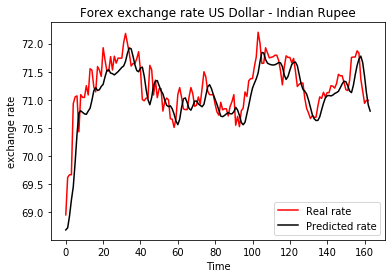

In [24]:
plt.plot(real_rate, color = 'red', label = 'Real rate') 
plt.plot(predicted_rate, color = 'black', label = 'Predicted rate') 
plt.title('Forex exchange rate US Dollar - Indian Rupee') 
plt.xlabel('Time') 
plt.ylabel('exchange rate') 
plt.legend() 
plt.show()